# Linear Regresion
ISLR Linear Regression Ï∞∏Ï°∞ÌïòÍ≥† ISLRÏóêÏÑú Ï†úÍ≥µÎêòÎäî Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©ÌïòÏßÄÎßå, Ï±Ö ÌùêÎ¶ÑÏùÑ Ï†ÑÏ†ÅÏúºÎ°ú Îî∞ÎùºÍ∞ÄÏßÄÎäî ÏïäÎäîÎã§.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d

import sklearn.linear_model as skl_lm
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

## 1. Load Datasets
Advertising Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö© (https://www.statlearning.com/resources-first-edition)

In [2]:
# Load Advertising dataset
ad_data = pd.read_csv('./data/Advertising.csv', index_col=0)
ad_data.head(3)

TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3

In [3]:
# data Ï†ïÎ≥¥ ÌôïÏù∏
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
# data ÌÜµÍ≥ÑÏπò ÌôïÏù∏
ad_data.describe()

TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

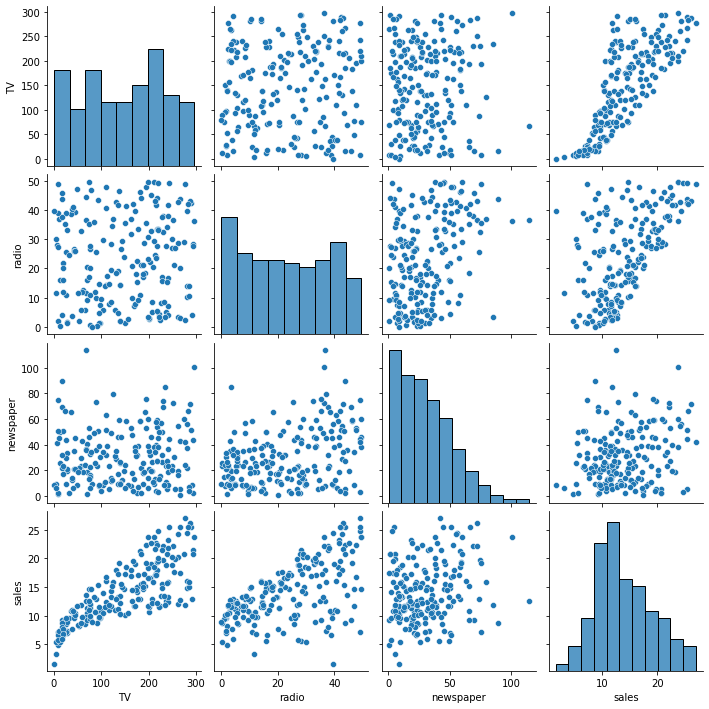

In [5]:
# data ÌäπÏÑ±ÏùÑ pairplotÏúºÎ°ú Í∞ÑÎã®Ìûà ÌôïÏù∏
sns.pairplot(ad_data)

----
**TIP)** *Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ Î∂ÑÎ•ò*       
    
- Mesokurtic :  Ï≤®ÎèÑÍ∞Ä ÎÇÆÏßÄÎèÑ ÎÜíÏßÄÎèÑ ÏïäÏùÄ Î∂ÑÌè¨    
- Leptokurtic : Ï≤®ÎèÑÍ∞Ä ÌÅ∞ Î∂ÑÌè¨    
- Platykurtic : Ï≤®ÎèÑÍ∞Ä ÎÇÆÏùÄ Î∂ÑÌè¨    
- Bimodel : ÏåçÎ¥â Î∂ÑÌè¨ (ÎëêÍ∞úÏùò Í∑πÎåÄÍ∞í)   
- Nagative Skewness (Left-skewed): Ïò§Î•∏Ï™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Î∂ÑÌè¨ (ÏôúÎèÑ < 0)     
- Positive Skewness (Right-skewed): ÏôºÏ™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Î∂ÑÌè¨ (ÏôúÎèÑ > 0)  

----

## 2. Simple Linear Regression

$Y = \beta_{0}X + \beta_{1}$
    
Ïù¥ Ïû•ÏóêÏÑúÎäî TVÎ•º XÎ°ú salesÎ•º YÎ°ú ÏÇ¨Ïö© 

### 2-1. seaborn Regression Plot 

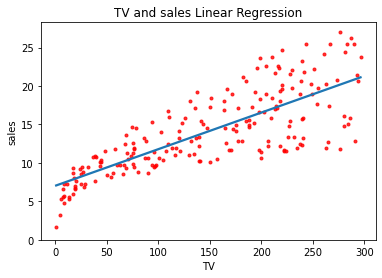

In [6]:
# sns Ïù¥Ïö©Ìïú Í∞ÑÎã®Ìïú ÌöåÍ∑Ä ÏãúÍ∞ÅÌôî
sns.regplot(x=ad_data['TV'], y=ad_data['sales'], order=1, ci=None, scatter_kws={'color': 'r', 's': 9})
plt.title('TV and sales Linear Regression')
plt.ylim(ymin=0)

plt.show()

### 2-2. sklearn Regression

In [7]:
# sklearn linear regression model Í∞ùÏ≤¥Ìôî
regr = skl_lm.LinearRegression()

# XÍ∞í, yÍ∞í ÏÑ†Î≥Ñ 
# sales = ùõΩ0 TV + ùõΩ1
X = ad_data['TV'].values.reshape(-1, 1)
y = ad_data['sales']

# linear regression ÌïôÏäµ
regr.fit(X, y)

# ÌöåÍ∑ÄÍ≥ÑÏàò, Ï†àÌé∏ Í∞í Ï∂úÎ†•
print('coefficient: ', regr.coef_[0])    # ÌöåÍ∑ÄÍ≥ÑÏàò: ùõΩ0
print('intercept: ', regr.intercept_)    # Ï†àÌé∏: ùõΩ1

coefficient:  0.04753664043301976
intercept:  7.032593549127694


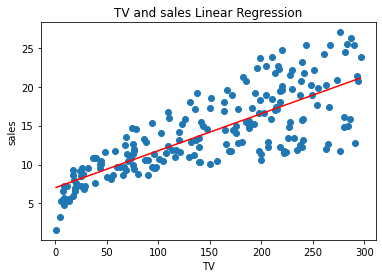

In [8]:
# regression Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.scatter(x=ad_data['TV'], y=ad_data['sales'])

X_sample = np.array([[ad_data['TV'].min()], [ad_data['TV'].max()]])
y_pred = regr.predict(X_sample)
plt.plot(X_sample, y_pred, c='red')

plt.xlabel('TV')
plt.ylabel('sales')
plt.title('TV and sales Linear Regression')

plt.show()

### 2-3. Ìï¥ÏÑù

sales = 0.4753 * TV + 7.0325

----

**TIP)** *SST, SSE, SSR*

- Ìé∏Ï∞®(Deviation): Í¥ÄÏ∏°ÏπòÍ∞Ä ÌèâÍ∑†ÏúºÎ°úÎ∂ÄÌÑ∞ Îñ®Ïñ¥Ï†∏ ÏûàÎäî Ï†ïÎèÑ, Ï¶â ÌèâÍ∑†Í≥ºÏùò Ï∞®Ïù¥
- Ïò§Ï∞®(Error): ÏòàÏ∏°ÌïòÍ∏∞ ÏúÑÌïòÏó¨ Ï∂îÏ†ïÎêú Í∞íÍ≥º Ïã§Ï†úÍ∞íÏùò Ï∞®Ïù¥, Ï¶â ÏòàÏ∏°Í∞íÏù¥ Ï†ïÌôïÌïòÏßÄ Î™ªÌïú Ï†ïÎèÑ
- ÏûîÏ∞®(residual): ÌèâÍ∑†Ïù¥ ÏïÑÎãàÎùº ÌöåÍ∑ÄÏãù Îì±ÏúºÎ°ú Ï∂îÏ†ïÎêú Í∞íÍ≥ºÏùò Ï∞®Ïù¥, Ï¶â Ï∂îÏ†ïÎêú Í∞íÏù¥ ÏÑ§Î™ÖÌï† Ïàò ÏóÜÏñ¥ÏÑú ÏïÑÏßÅ ÎÇ®ÏïÑÏûàÎäî Ìé∏Ï∞®Î°ú Ìé∏Ï∞®Ïùò ÏùºÎ∂Ä

![img_01](./image/regression_01.png)

- SST(Total sun of squares): YÏùò Ï¥ù Î≥ÄÎèô $(SST = SSE + SSR)$
- SSE(Error sum of squares): Ï∂îÏ†ïÍ∞íÍ≥º Ïã§Ï†úÍ∞í Ï∞®Ïù¥(Ïò§Ï∞®)Ïùò Ï†úÍ≥±, Ïò§Ï∞®Ïóê ÎåÄÌïú Î≥ÄÎèô
- SSR(Regression sum of squares): ÏßÅÏÑ†ÏúºÎ°ú ÏÑ§Î™ÖÏù¥ Î∂àÍ∞ÄÎä•Ìïú Î≥ÄÎèô, ÏßÅÏÑ†Ïóê ÎåÄÌïú Î≥ÄÎèô
- MSE(Mean Squares Error): Ïò§Ï∞®Í∞Ä Ïª§ÏÑú Í∞íÏù¥ Ïª§ÏßÄÎäî Í±¥ÏßÄ Îç∞Ïù¥ÌÑ∞Í∞Ä ÎßéÏïÑ Í∞íÏù¥ Ïª§ÏßÄÎäîÏßÄ Ïïå Ïàò ÏóÜÎäî SSEÏùò Î¨∏Ï†úÎ•º Ìï¥Í≤∞ $(MSE = SSE / (n-2))$
- MSR(Regression Mean Squares): ÏûîÏ∞® ÌèâÍ∑† Ï†úÍ≥±Ïùò Ìï© $(MSR = SSR / 1)$
- $R^{2}$(Í≤∞Ï†ïÍ≥ÑÏàò): ÎèÖÎ¶ΩÎ≥ÄÏàòÍ∞Ä Ï¢ÖÏÜçÎ≥ÄÏàòÎ•º ÏñºÎßàÎßåÌÅº ÏÑ§Î™Ö Ìï¥Ï£ºÎäîÏßÄÎ•º Í∞ÄÎ¶¨ÌÇ§Îäî ÏßÄÌëú, Ï¶â ÏÑ§Î™ÖÎ†•Ïù¥Î©∞ ÎÜíÏùÑ ÏàòÎ°ù ÎèÖÎ¶ΩÎ≥ÄÏàòÍ∞Ä Ï¢ÖÏÜçÎ≥ÄÏàòÎ•º ÎßéÏù¥ ÏÑ§Î™ÖÌïòÎäî Í≤É. ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò ÏàòÍ∞Ä Ï¶ùÍ∞ÄÌïòÎäî Í≤ÉÎßåÏúºÎ°ú ÏÉÅÏäπÌïòÎØÄÎ°ú Í≤∞Ï†ïÍ≥ÑÏàòÎßåÏùÑ Í∞ÄÏßÄÍ≥† Ïú†Ïö©ÏÑ± ÌåêÎã®ÏùÄ Î¨¥Î¶¨Í∞Ä ÏûàÏùå $(R^{2} = SSR / SST, R^{2} = 1 - (SSE / SST))$
- $Adjusted R^{2}$(Ï°∞Ï†ïÎêú Í≤ΩÏ†ïÍ≥ÑÏàò): ÎèÖÎ¶Ω Î≥ÄÏàòÏùò Îã®Ïàú Ï¶ùÍ∞ÄÍ∞Ä Í≤∞Ï†ïÍ≥ÑÏàòÎ•º ÏÉÅÏäπÏãúÌÇ§Îäî Í≤ÉÏùÑ Î∞©ÏßÄ $(1 - (n-1)(1-R^{2})/(n-p-1))$, ($p:$ ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò Ïàò)

----

In [9]:
# ÏûîÏ∞® Í≥ÑÏÇ∞
y_pred = regr.predict(np.array(ad_data['TV']).reshape(-1, 1))
rasiduals = ad_data['sales'] - y_pred
rasiduals.describe()    # ÏûîÏ∞® ÌÜµÍ≥ÑÏπò ÌôïÏù∏

count    2.000000e+02
mean    -1.634248e-15
std      3.250458e+00
min     -8.385982e+00
25%     -1.954522e+00
50%     -1.912655e-01
75%      2.067109e+00
max      7.212369e+00
Name: sales, dtype: float64

In [10]:
# SST, SSE, SSR Í∞í ÌôïÏù∏
sst = ((ad_data['sales'] - ad_data['sales'].mean())**2).sum()
sse = ((ad_data['sales'] - y_pred)**2).sum()
ssr = ((y_pred - ad_data['sales'].mean())**2).sum()
print('SST: ', sst)
print('SSE: ', sse)
print('SSR: ', ssr)
print('SSE+SSR: ', sse+ssr)

SST:  5417.14875
SSE:  2102.5305831313517
SSR:  3314.6181668686504
SSE+SSR:  5417.148750000002


In [11]:
# R^2, Adjusted R^2 Í∞í ÌôïÏù∏
r2 = ssr/sst
adjusted_r2 = 1 - (len(ad_data['sales']) - 1)*(1 - r2)/(len(ad_data['sales']) - 1 - 1)
print('R2: ', r2)
print('Adjusted R2: ', adjusted_r2)

R2:  0.6118750508500713
Adjusted R2:  0.6099148238341625


In [12]:
# sklearn r2_score() Ìï®ÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ R^2Í∞í ÌïúÎ≤àÏóê ÏÇ∞Ï∂ú
r2_score(ad_data['sales'], y_pred)

0.611875050850071

<br/><br/>
**Í≤∞Î°†)**        
*'TV' ÎèÖÎ¶ΩÎ≥ÄÏàòÎäî 'Sales' Ï¢ÖÏÜç Î≥ÄÏàòÏóê ÎåÄÌï¥ 0.6 Ï†ïÎèÑÏùò ÏÑ§Î™ÖÎ†•ÏùÑ Í∞ÄÏßÑÎã§.    
Ïù¥Îäî, Îß§Ïö∞ ÎÜíÏùÄ ÏàòÏπòÏù¥Î©∞ ÌòÑÏã§ÏóêÏÑúÏùò Î¨∏Ï†úÎäî Î≥¥ÌÜµ 0.2 ~ 0.3 Ï†ïÎèÑÏùò ÏÑ§Î™ÖÎ†•ÏùÑ Í∞ÄÏßÄÎäî Í≤ΩÏö∞Í∞Ä ÎåÄÎ∂ÄÎ∂ÑÏù¥Îã§.*
<br/><br/>


## 3. Multiple Linear Regression

$Y = \beta_{0}X_{0} + \beta_{1}X_{1} + \beta_{2}X_{2}$ $...$

In [13]:
# Î≥ÄÏàòÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌååÏïÖ
ad_data.corr()    # corr() Ìï®ÏàòÎäî Í∏∞Î≥∏Ï†ÅÏúºÎ°ú ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º ÏÇ¨Ïö©

TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000

In [44]:
# sklearn linear regression Í∞ùÏ≤¥Ìôî
regr = skl_lm.LinearRegression()

# TV, radio Îëê Î≥ÄÏàòÏùò ÎåÄÌïú sales ÌöåÍ∑Ä
# ÎèÖÎ¶Ω, Ï¢ÖÏÜç Î≥ÄÏàò Î∂ÑÌï†
# sales = ùõΩ0*TV + ùõΩ1*radio + ùõΩ2
X = ad_data[['TV', 'radio']]
y = ad_data[['sales']]

# linear regression ÌïôÏäµ
regr.fit(X, y)

# ÌöåÍ∑ÄÍ≥ÑÏàò, Ï†àÌé∏ Í∞í Ï∂úÎ†•
print('TV coefficient: ', regr.coef_[0][0])           # ÌöåÍ∑ÄÍ≥ÑÏàò: ùõΩ0
print('radio coefficient: ', regr.coef_[0][1])        # ÌöåÍ∑ÄÍ≥ÑÏàò: ùõΩ1
print('intercept: ', regr.intercept_[0])              # Ï†àÌé∏: ùõΩ2

TV coefficient:  0.04575481510107615
radio coefficient:  0.1879942266203092
intercept:  2.9210999124051362


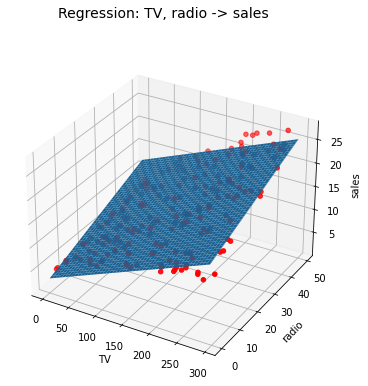

In [51]:
# TV, radio ÎèÖÎ¶Ω Î≥ÄÏàòÏóê ÎåÄÌïú sales Ï¢ÖÏÜçÎ≥ÄÏàò ÏãúÍ∞ÅÌôî
fig = plt.figure(figsize=(8, 6))
ax3d = plt.axes(projection="3d")
fig.suptitle('Regression: TV, radio -> sales', fontsize=14)

# ÌèâÎ©¥ ÏãúÍ∞ÅÌôî
tv = np.arange(ad_data['TV'].min(), ad_data['TV'].max())             # TV Î≥ÄÏàò Î∂ÑÌè¨
radio = np.arange(ad_data['radio'].min(), ad_data['radio'].max())    # radio Î≥ÄÏàò Î∂ÑÌè¨
x0, x1 = np.meshgrid(tv, radio, indexing='xy')    # TV, radio Î≥ÄÏàò 2Ï∞®Ïõê Í≤©ÏûêÎ°ú Î≥ÄÌôò
z = np.zeros((radio.size, tv.size))
for (i, j), _ in np.ndenumerate(z):
    z[i, j] = x0[i, j]*regr.coef_[0][0] + x1[i, j]*regr.coef_[0][1] + regr.intercept_[0]    # ÌïôÏäµÎêú ÌöåÍ∑ÄÍ≤∞Í≥ºÏóê Îî∞Îùº salesÍ∞í Í≤∞Ï†ï
ax3d.plot_surface(b0, b1, z)

# ÏÇ∞Ï†êÎèÑ ÏãúÍ∞ÅÌôî
ax3d.scatter3D(ad_data['TV'], ad_data['radio'], ad_data['sales'], c='r')

ax3d.set_xlabel('TV')
ax3d.set_ylabel('radio')
ax3d.set_zlabel('sales')

plt.show()

In [46]:
# sklearn linear regression Í∞ùÏ≤¥Ìôî
regr = skl_lm.LinearRegression()

# TV, radio, newspaper ÏÑ∏ Î≥ÄÏàòÏùò ÎåÄÌïú sales ÌöåÍ∑Ä
# ÎèÖÎ¶Ω, Ï¢ÖÏÜç Î≥ÄÏàò Î∂ÑÌï†
# sales = ùõΩ0*TV + ùõΩ1*radio + ùõΩ2*newspaper + ùõΩ3
X = ad_data[['TV', 'radio', 'newspaper']]
y = ad_data[['sales']]

# linear regression ÌïôÏäµ
regr.fit(X, y)

# ÌöåÍ∑ÄÍ≥ÑÏàò, Ï†àÌé∏ Í∞í Ï∂úÎ†•
print('TV coefficient: ', regr.coef_[0][0])           # ÌöåÍ∑ÄÍ≥ÑÏàò: ùõΩ0
print('radio coefficient: ', regr.coef_[0][1])        # ÌöåÍ∑ÄÍ≥ÑÏàò: ùõΩ1
print('newspaper coefficient: ', regr.coef_[0][2])        # ÌöåÍ∑ÄÍ≥ÑÏàò: ùõΩ2
print('intercept: ', regr.intercept_[0])              # Ï†àÌé∏: ùõΩ3

TV coefficient:  0.04576464545539761
radio coefficient:  0.18853001691820453
newspaper coefficient:  -0.00103749304247629
intercept:  2.9388893694594085


----    
**TIP)** *data scaling*    
    
Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Î≥Ñ Ï†ïÍ∑úÌôî ÎπÑÍµê Ï∞∏Í≥†ÏûêÎ£å:     
https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

- KDE(Kernel Density Estimation): non-parametric Î∞ÄÎèÑÏ∂îÏ†ï Î∞©Î≤ï Ï§ë ÌïòÎÇòÎ°úÏÑú, Ïª§ÎÑêÌï®Ïàò(Kernel Function)Î•º Ïù¥Ïö©ÌïòÏó¨ ÌûàÏä§ÌÜ†Í∑∏Îû® Î∞©Î≤ïÏùò Î¨∏Ï†úÏ†êÏùÑ Í∞úÏÑ†Ìïú Î∞©Î≤ï  
- Kernel Function: ÏõêÏ†êÏùÑ Ï§ëÏã¨ÏúºÎ°ú ÎåÄÏπ≠Ïù¥Î©¥ÏÑú Ï†ÅÎ∂ÑÍ∞íÏù¥ 1Ïù∏ non-negative Ìï®Ïàò (ex. Í∞ÄÏö∞ÏãúÏïà Ìï®Ïàò), Ï£ºÎ°ú Ïª§ÎÑêÌï®ÏàòÎäî Epanechnikov, GaussianÏùÑ ÏÇ¨Ïö©

In [ ]:
# Ïä§ÏºÄÏùºÎßÅ Î™®ÎìàÎì§ Í∞ùÏ≤¥Ìôî
nm_scaler = MinMaxScaler()
rb_scaler = RobustScaler()
st_scaler = StandardScaler()

# Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ ÏàòÌñâ
nm_norm_X = nm_scaler.fit_transform(ad_data)
rb_norm_X = rb_scaler.fit_transform(ad_data)
st_norm_X = st_scaler.fit_transform(ad_data)

SCALER2DATA = {'original': ad_data,
               'min-max_scaler': nm_norm_X, 
               'robust_scaler': rb_norm_X,
               'standard_scaler': st_norm_X}

# Îç∞Ïù¥ÌÑ∞ KDE ÏãúÍ∞ÅÌôî
fig, axs = plt.subplots(1, 4, figsize=[16, 4])
fig.subplots_adjust(wspace=0.3)
for i, (k, v) in enumerate(SCALER2DATA.items()):
    sns.kdeplot(data=v, shade=True, ax=axs[i], label=['TV', 'radio', 'newspaper', 'sales'])
    axs[i].set_title(k)
    
plt.show()

----